In [4]:
from google.colab import drive

# mounting drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# load dataset
df = pd.read_csv('drive/MyDrive/Celerates/Notebook/Tugas-2/data.csv')
print(f'shape: {df.shape}', end='\n\n')
df.head()

shape: (294, 14)



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0


PRE-PROCESSING

In [8]:
# pre-process
df.describe()

,age,sex,cp,oldpeak,num
count,294.000000,294.000000,294.000000,294.000000,294.000000
mean,47.826531,0.724490,2.982993,0.586054,0.360544
std,7.811812,0.447533,0.965117,0.908648,0.480977
min,28.000000,0.000000,1.000000,0.000000,0.000000
25%,42.000000,0.000000,2.000000,0.000000,0.000000
50%,49.000000,1.000000,3.000000,0.000000,0.000000
75%,54.000000,1.000000,4.000000,1.000000,1.000000
max,66.000000,1.000000,4.000000,5.000000,1.000000


In [38]:
print(f'null:\n{df.isnull().sum()}', end="\n\n")
print(f'nan:\n{df.isna().sum()}', end="\n\n")

'''

ada anomali di data dimana data tersebut berisi
'?' yang tidak terhitung null/nan value

'''

null:
age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            0
thal          0
num           0
dtype: int64

nan:
age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            0
thal          0
num           0
dtype: int64



" \n\nada anomali di data dimana data tersebut berisi\n'?' yang tidak terhitung null/nan value\n\n"

In [39]:
missing_analysis = pd.DataFrame({
    'feature': ['slope', 'thal', 'ca'],
    'total_missing': [
        (df['slope'] == '?').sum(),
        (df['thal'] == '?').sum(),
        (df['ca'] == '?').sum()
    ],
    'missing_percentage': [
        ((df['slope'] == '?').sum() / len(df)) * 100,
        ((df['thal'] == '?').sum() / len(df)) * 100,
        ((df['ca'] == '?').sum() / len(df)) * 100
    ]
})

print("Missing Value Analysis:")
print(missing_analysis)

Missing Value Analysis:
  feature  total_missing  missing_percentage
0   slope            190           64.625850
1    thal            266           90.476190
2      ca            291           98.979592


In [42]:
# drop unused cell
df_clean = df.drop(['slope', 'thal', 'ca'], axis=1)

print(f'Original shape: {df.shape}')
print(f'After dropping: {df_clean.shape}', end='\n\n')

# re-check
print(f'null:\n{df_clean.isnull().sum()}', end="\n\n")
print(f'nan:\n{df_clean.isna().sum()}', end="\n\n")

Original shape: (294, 14)
After dropping: (294, 11)

null:
age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
num           0
dtype: int64

nan:
age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
num           0
dtype: int64



Setup Model

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np

In [74]:
df = df.rename(columns={'num       ': 'num'})
df_clean = df_clean.rename(columns={'num       ': 'num'})

col = df_clean.columns.to_list()
print(col)

['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'num', 'heart_disease']


In [82]:
# clean '?' di data train

numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

df_clean[numerical_cols] = df_clean[numerical_cols].replace('?', np.nan)
df_clean[numerical_cols] = df_clean[numerical_cols].astype(float)

categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang']

df_clean[categorical_cols] = df_clean[categorical_cols].replace('?', np.nan)

# print(df_clean.isnull().sum())
df_clean.dropna(inplace=True)


age              0
sex              0
cp               0
trestbps         0
chol             0
fbs              0
restecg          0
thalach          0
exang            0
oldpeak          0
num              0
heart_disease    0
dtype: int64


In [83]:
df_clean = df_clean.apply(lambda col: col.str.strip() if col.dtype == "object" else col)

# create target
df_clean['heart_disease'] = (df_clean['num'] > 0).astype(int)

X = df_clean.drop(['num', 'heart_disease'], axis=1)
y = df_clean['heart_disease']

In [84]:
print(f"Target distribution:")
print(y.value_counts())
print(f"Baseline accuracy: {max(y.value_counts(normalize=True)):.3f}")

Target distribution:
heart_disease
0    163
1     98
Name: count, dtype: int64
Baseline accuracy: 0.625


In [85]:
# split dataset 80:20
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [95]:
# train model
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [97]:
# trained model report
y_pred = rfc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.90        33
           1       0.84      0.80      0.82        20

    accuracy                           0.87        53
   macro avg       0.86      0.85      0.86        53
weighted avg       0.87      0.87      0.87        53



[[30  3]
 [ 4 16]]


'\n\n30 -> True Negative\n3 -> False Positive\n4 -> False Negative\n16 -> True Positive\n\n'

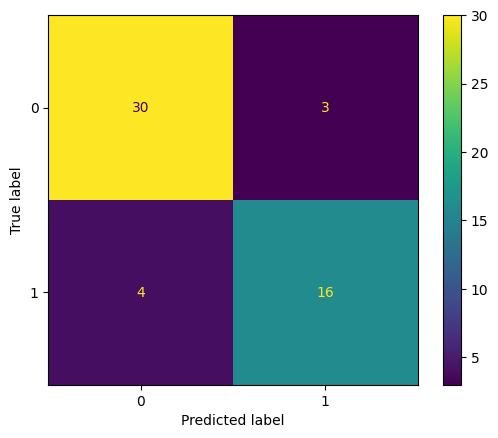

In [98]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
ConfusionMatrixDisplay(cm).plot()

'''

30 -> True Negative
3 -> False Positive
4 -> False Negative
16 -> True Positive

'''


In [100]:
import pickle

In [101]:
# save model
try:
  with open('model.pkl', 'wb') as f:
    pickle.dump(rfc, f)
except Exception as e:
  print(e)

# path default: /content/model.pkl